# Libraries and Data

In [1]:
# import libraries
import yfinance as yf
from causalimpact import CausalImpact
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Dates
training_start = "2020-09-01"
training_end = "2020-10-19"
treatment_start = "2020-10-20"
treatment_end = "2020-10-23"
end_stock = "2020-10-24"

# Loading financial data

In [5]:
y = ["BTC-USD"]
y = yf.download(tickers=y, start = training_start, end = end_stock, interval='1d')

y = y['Adj Close'].rename('y')
y[:2]

[*********************100%%**********************]  1 of 1 completed


Date
2020-09-01    11970.478516
2020-09-02    11414.034180
Name: y, dtype: float64

In [6]:
# Load more stock data
stocks = ['ZAL.DE', 'SQ', 'CRSP', 'TRMB', 'JD', 'DE', 'KTOS', 'GOOG']
X = yf.download(tickers=stocks, start = training_start, end= end_stock, interval='1d')

[*********************100%%**********************]  8 of 8 completed


# Data preparation

In [9]:
# Getting the adjusted close
X = X['Adj Close']
X.head()

,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,
2020-09-01,93.419998,210.029694,83.035500,79.267685,19.700001,166.660004,53.410000,77.000000
2020-09-02,93.930000,209.470078,86.414001,79.959564,19.910000,162.880005,54.310001,77.000000
2020-09-03,85.690002,203.391785,82.092003,75.952454,19.520000,152.860001,50.900002,75.080002
2020-09-04,82.019997,203.903122,79.552002,76.874954,19.260000,146.389999,49.959999,71.739998
2020-09-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.000000


In [11]:
# Time zones
X.index = X.index.tz_localize(None)
X.index

DatetimeIndex(['2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04',
               '2020-09-07', '2020-09-08', '2020-09-09', '2020-09-10',
               '2020-09-11', '2020-09-14', '2020-09-15', '2020-09-16',
               '2020-09-17', '2020-09-18', '2020-09-21', '2020-09-22',
               '2020-09-23', '2020-09-24', '2020-09-25', '2020-09-28',
               '2020-09-29', '2020-09-30', '2020-10-01', '2020-10-02',
               '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08',
               '2020-10-09', '2020-10-12', '2020-10-13', '2020-10-14',
               '2020-10-15', '2020-10-16', '2020-10-19', '2020-10-20',
               '2020-10-21', '2020-10-22', '2020-10-23'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
# Combine everything
df = pd.concat([y, X], axis =1).dropna()
df.head()

,y,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,
2020-09-01,11970.478516,93.419998,210.029694,83.035500,79.267685,19.700001,166.660004,53.410000,77.000000
2020-09-02,11414.034180,93.930000,209.470078,86.414001,79.959564,19.910000,162.880005,54.310001,77.000000
2020-09-03,10245.296875,85.690002,203.391785,82.092003,75.952454,19.520000,152.860001,50.900002,75.080002
2020-09-04,10511.813477,82.019997,203.903122,79.552002,76.874954,19.260000,146.389999,49.959999,71.739998
2020-09-08,10131.516602,81.459999,202.841843,76.619499,73.242615,19.230000,139.110001,49.139999,73.440002


# Data Analysis section

In [13]:
# Prepare a dataframe with only training data
df_training = df[df.index <= training_end]
df_training.tail(1)

,y,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,
2020-10-19,11742.037109,107.720001,230.57872,76.730499,77.461121,20.639999,186.960007,51.970001,85.0


In [21]:
# Stationarity
from statsmodels.tsa.stattools import adfuller


def stationary_test(array):
    test = adfuller(x = array)[1]
    # how to read - ifelse
    if test < 0.05:
        print("The time series is stationary")
    else:
        print("The time series is not stationary")

In [23]:
stationary_test(df.y)

The time series is not stationary


In [20]:
# Differencing: subtract or divide
differencing = df_training.pct_change().dropna()
differencing.head()

,y,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,
2020-09-02,-0.046485,0.005459,-0.002664,0.040687,0.008728,0.010660,-0.022681,0.016851,0.000000
2020-09-03,-0.102395,-0.087725,-0.029017,-0.050015,-0.050114,-0.019588,-0.061518,-0.062788,-0.024935
2020-09-04,0.026014,-0.042829,0.002514,-0.030941,0.012146,-0.013320,-0.042326,-0.018468,-0.044486
2020-09-08,-0.036178,-0.006828,-0.005205,-0.036863,-0.047250,-0.001558,-0.049730,-0.016413,0.023697
2020-09-09,0.010939,0.046526,0.025114,0.016034,0.012726,0.016641,0.036662,0.019740,-0.009804


In [22]:
stationary_test(differencing.y)

The time series is stationary


<AxesSubplot:>

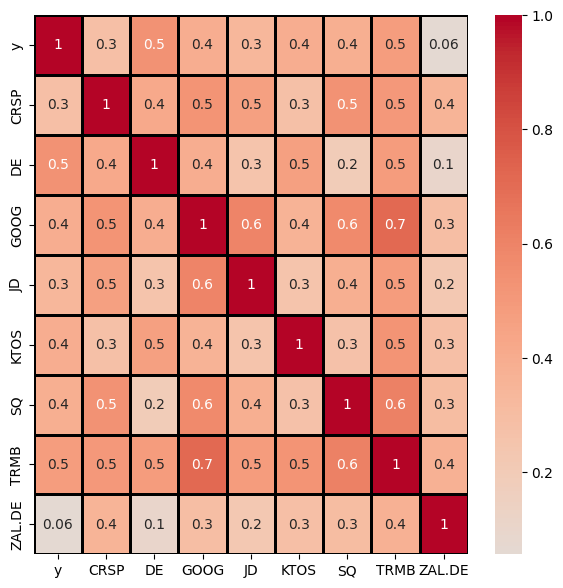

In [32]:
# Correlation Matrix
plt.figure(figsize=(7,7))
sns.heatmap(differencing.corr(), cmap='coolwarm', annot=True, fmt='.1g', linewidths=1, linecolor='black', center=0)

# Causal Impact

In [33]:
df_final = df.drop(columns=['ZAL.DE'])
df_final.head(1)

,y,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB
Date,,,,,,,,
2020-09-01,11970.478516,93.419998,210.029694,83.0355,79.267685,19.700001,166.660004,53.41


In [34]:
# Pre and post period
pre_period =[training_start, training_end]
post_period = [treatment_start, treatment_end]

Instructions for updating:
Please use `StructuralTimeSeries.joint_distribution(observed_time_series).log_prob`
Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.


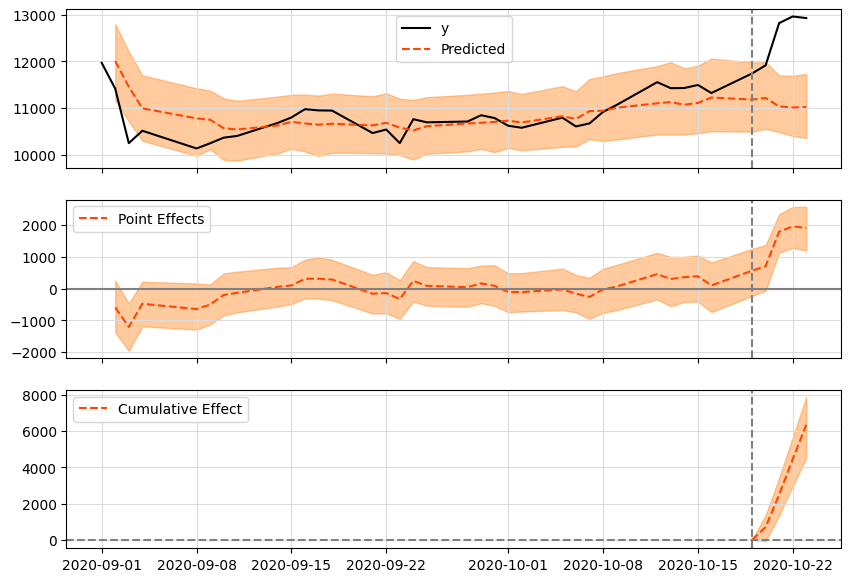

In [35]:
# Google Causal Impact
impact = CausalImpact(df_final, pre_period=pre_period, post_period=post_period)
impact.plot()

In [36]:
# Summary
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    12659.36           50637.45
Prediction (s.d.)         11070.99 (224.47)  44283.95 (897.88)
95% CI                    [10684.85, 11564.76][42739.39, 46259.02]

Absolute effect (s.d.)    1588.38 (224.47)   6353.51 (897.88)
95% CI                    [1094.61, 1974.52] [4378.43, 7898.07]

Relative effect (s.d.)    14.35% (2.03%)     14.35% (2.03%)
95% CI                    [9.89%, 17.84%]    [9.89%, 17.84%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [37]:
# Summary Report
print(impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 12659.36. By contrast, in the absence of an
intervention, we would have expected an average response of 11070.99.
The 95% interval of this counterfactual prediction is [10684.85, 11564.76].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 1588.38 with a 95% interval of
[1094.61, 1974.52]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 50637.45.
By contrast, had the intervention not taken place, we would have expected
a sum of 44283.95. The 95% interval of this prediction is [42739.39, 46259.02].


The above results are given in terms of absolute numbers. In relative


# Challenge Time: Volkswagen Scandal example

## Libraries, Dates and Data

In [38]:
# Import libraries
import yfinance as yf

In [217]:
# Dates
training_start = "2014-01-08"
training_end = "2015-08-26"
treatment_start = "2015-09-02"
treatment_end = "2015-09-30"
end_stock = "2015-10-02"

## Data Preparation

In [218]:
# Donload VW stock
y = ["VOW.DE"]
y = yf.download(tickers = y, start=training_start, end=end_stock, interval="1wk")
y = y['Adj Close'].rename('y')
y

[*********************100%%**********************]  1 of 1 completed


Date
2014-01-06    125.620438
2014-01-13    127.199570
2014-01-20    119.239532
2014-01-27    116.242386
2014-02-03    117.628174
                 ...    
2015-08-31    107.641975
2015-09-07    111.881699
2015-09-14    108.584152
2015-09-21     77.761986
2015-09-28     68.071182
Name: y, Length: 91, dtype: float64

In [220]:
X = ['AAPL', 'AMZN', 'NVDA', 'BAC', 'META']
X = yf.download(tickers=X, start=training_start, end=end_stock, interval='1wk')
X = X['Adj Close']
X

[*********************100%%**********************]  5 of 5 completed


,AAPL,AMZN,BAC,META,NVDA
Date,,,,,
2014-01-06,16.708563,19.882999,14.088020,57.939999,3.710692
2014-01-13,16.950899,19.980499,14.289637,56.299999,3.772026
2014-01-20,17.120207,19.379999,13.819200,54.450001,3.670590
2014-01-27,15.694637,17.934500,14.071221,62.570000,3.703616
2014-02-03,16.292828,18.054001,14.130021,64.320000,3.743718
...,...,...,...,...,...
2015-08-31,24.796280,24.950001,13.323909,88.260002,5.289161
2015-09-07,25.917299,26.472000,13.699906,92.050003,5.508023
2015-09-14,25.744835,27.013000,13.289934,94.400002,5.663659


In [221]:
X.index = X.index.tz_localize(None)
X.index


DatetimeIndex(['2014-01-06', '2014-01-13', '2014-01-20', '2014-01-27',
               '2014-02-03', '2014-02-10', '2014-02-17', '2014-02-24',
               '2014-03-03', '2014-03-10', '2014-03-17', '2014-03-24',
               '2014-03-31', '2014-04-07', '2014-04-14', '2014-04-21',
               '2014-04-28', '2014-05-05', '2014-05-12', '2014-05-19',
               '2014-05-26', '2014-06-02', '2014-06-09', '2014-06-16',
               '2014-06-23', '2014-06-30', '2014-07-07', '2014-07-14',
               '2014-07-21', '2014-07-28', '2014-08-04', '2014-08-11',
               '2014-08-18', '2014-08-25', '2014-09-01', '2014-09-08',
               '2014-09-15', '2014-09-22', '2014-09-29', '2014-10-06',
               '2014-10-13', '2014-10-20', '2014-10-27', '2014-11-03',
               '2014-11-10', '2014-11-17', '2014-11-24', '2014-12-01',
               '2014-12-08', '2014-12-15', '2014-12-22', '2014-12-29',
               '2015-01-05', '2015-01-12', '2015-01-19', '2015-01-26',
      

In [222]:
# Combine everything
df = pd.concat([y, X], axis =1).dropna()
df.head()

,y,AAPL,AMZN,BAC,META,NVDA
Date,,,,,,
2014-01-06,125.620438,16.708563,19.882999,14.088020,57.939999,3.710692
2014-01-13,127.199570,16.950899,19.980499,14.289637,56.299999,3.772026
2014-01-20,119.239532,17.120207,19.379999,13.819200,54.450001,3.670590
2014-01-27,116.242386,15.694637,17.934500,14.071221,62.570000,3.703616
2014-02-03,117.628174,16.292828,18.054001,14.130021,64.320000,3.743718


## Data analysis

In [223]:
# Training data
df_training = df[df.index <= training_end]
df_training.tail(1)

,y,AAPL,AMZN,BAC,META,NVDA
Date,,,,,,
2015-08-24,114.741844,25.70853,25.900499,13.928376,91.010002,5.527476


In [224]:
stationary_test(df_training.y)

The time series is not stationary


In [225]:
difference = df_training.pct_change().dropna()
difference.head(2)

,y,AAPL,AMZN,BAC,META,NVDA
Date,,,,,,
2014-01-13,0.012571,0.014504,0.004904,0.014311,-0.028305,0.016529
2014-01-20,-0.062579,0.009988,-0.030054,-0.032922,-0.032860,-0.026892


In [226]:
stationary_test(difference.y)

The time series is stationary


<AxesSubplot:>

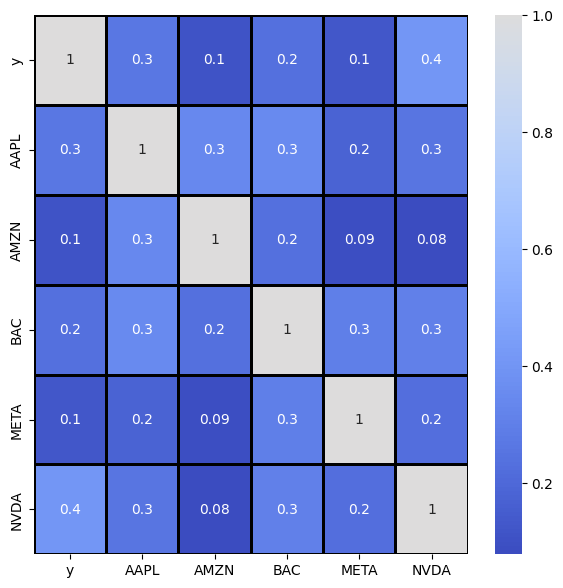

In [227]:
# Heatmap
m = difference.corr()
plt.figure(figsize=(7,7))
sns.heatmap(m, annot=True, cmap='coolwarm', fmt='.1g',  center=True, linewidths=1, linecolor='black')

## Causal Impact

In [233]:
# Get first and last date
print(df_final.head(10))
print(df_final.tail(10))

                     y       AAPL       AMZN        BAC      NVDA
Date                                                             
2014-01-06  125.620453  16.708551  19.882999  14.088018  3.710693
2014-01-13  127.199554  16.950905  19.980499  14.289640  3.772026
2014-01-20  119.239487  17.120203  19.379999  13.819197  3.670590
2014-01-27  116.242409  15.694635  17.934500  14.071221  3.703616
2014-02-03  117.628166  16.292833  18.054001  14.130021  3.743719
2014-02-10  126.200508  17.157078  17.867500  14.029220  4.224952
2014-02-17  125.040337  16.566031  17.337999  13.684783  4.397160
2014-02-24  119.303955  16.597252  18.105000  13.886401  4.335825
2014-03-03  115.823456  16.729725  18.603001  14.558461  4.350664
2014-03-10  112.310715  16.548374  18.687000  14.121661  4.222703
                     y       AAPL       AMZN        BAC      NVDA
Date                                                             
2015-07-27  123.860611  27.402180  26.807501  15.222454  4.831111
2015-08-03

In [242]:
# Dates
training_start = "2014-01-06"
training_end = "2015-08-31"
treatment_start = "2015-09-07"
treatment_end = "2015-09-28"
end_stock = "2015-10-02"

In [239]:
df_final = df.drop(columns=['META'])
df_final.head(1)

,y,AAPL,AMZN,BAC,NVDA
Date,,,,,
2014-01-06,125.620438,16.708563,19.882999,14.08802,3.710692


In [243]:
# Set pre and post
pre_period = [training_start, training_end]
post_period = [treatment_start, treatment_end]


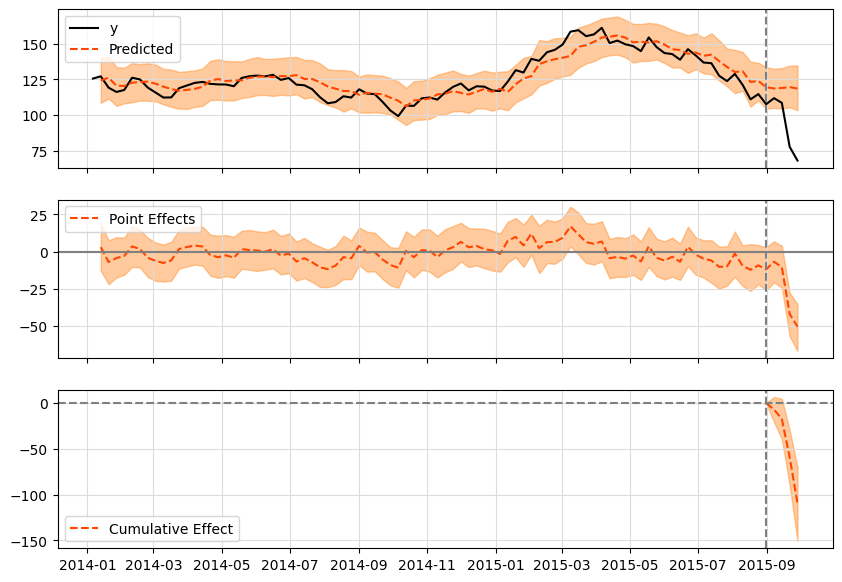

In [244]:
impact = CausalImpact(df_final, pre_period=pre_period, post_period=post_period)
impact.plot()

In [194]:
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    87.2               436.02
Prediction (s.d.)         119.95 (4.61)      599.77 (23.03)
95% CI                    [111.39, 129.45]   [556.95, 647.24]

Absolute effect (s.d.)    -32.75 (4.61)      -163.75 (23.03)
95% CI                    [-42.24, -24.19]   [-211.22, -120.93]

Relative effect (s.d.)    -27.3% (3.84%)     -27.3% (3.84%)
95% CI                    [-35.22%, -20.16%] [-35.22%, -20.16%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [195]:
print(impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 87.2. By contrast, in the absence of an
intervention, we would have expected an average response of 119.95.
The 95% interval of this counterfactual prediction is [111.39, 129.45].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -32.75 with a 95% interval of
[-42.24, -24.19]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 436.02.
By contrast, had the intervention not taken place, we would have expected
a sum of 599.77. The 95% interval of this prediction is [556.95, 647.24].


The above results are given in terms of absolute numbers. In relative
terms, the response v